In [5]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Pastikan Anda memiliki TensorFlow versi terbaru
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [12]:
# Mendefinisikan nama kelas CIFAR-10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
# Membuat model Sequential
model = Sequential()

# Menambahkan lapisan-lapisan pada model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Menampilkan arsitektur model
model.summary()

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [8]:
# Melatih model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
16/16 [==============================] - 2s 73ms/step - loss: 2.2958 - accuracy: 0.1200 - val_loss: 2.2374 - val_accuracy: 0.1600
Epoch 2/10
16/16 [==============================] - 1s 42ms/step - loss: 2.1394 - accuracy: 0.1820 - val_loss: 2.1378 - val_accuracy: 0.1900
Epoch 3/10
16/16 [==============================] - 1s 44ms/step - loss: 2.0650 - accuracy: 0.2340 - val_loss: 2.0511 - val_accuracy: 0.2200
Epoch 4/10
16/16 [==============================] - 1s 43ms/step - loss: 1.9482 - accuracy: 0.2780 - val_loss: 1.9829 - val_accuracy: 0.3000
Epoch 5/10
16/16 [==============================] - 1s 41ms/step - loss: 1.8536 - accuracy: 0.3200 - val_loss: 1.9696 - val_accuracy: 0.2100
Epoch 6/10
16/16 [==============================] - 1s 71ms/step - loss: 1.8205 - accuracy: 0.3140 - val_loss: 1.9105 - val_accuracy: 0.2900
Epoch 7/10
16/16 [==============================] - 1s 75ms/step - loss: 1.6516 - accuracy: 0.4080 - val_loss: 1.8852 - val_accuracy: 0.2600
Epoch 8/10
16

4/4 [==============================] - 0s 21ms/step - loss: 1.7877 - accuracy: 0.3100
Test Loss: 1.7877126932144165
Test Accuracy: 0.3100000023841858


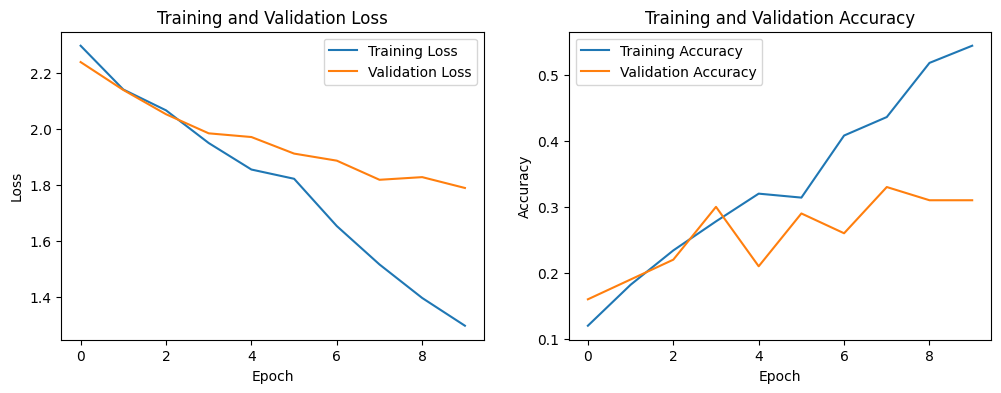

In [9]:
# Mengevaluasi model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting hasil training
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


4/4 [==============================] - 0s 10ms/step


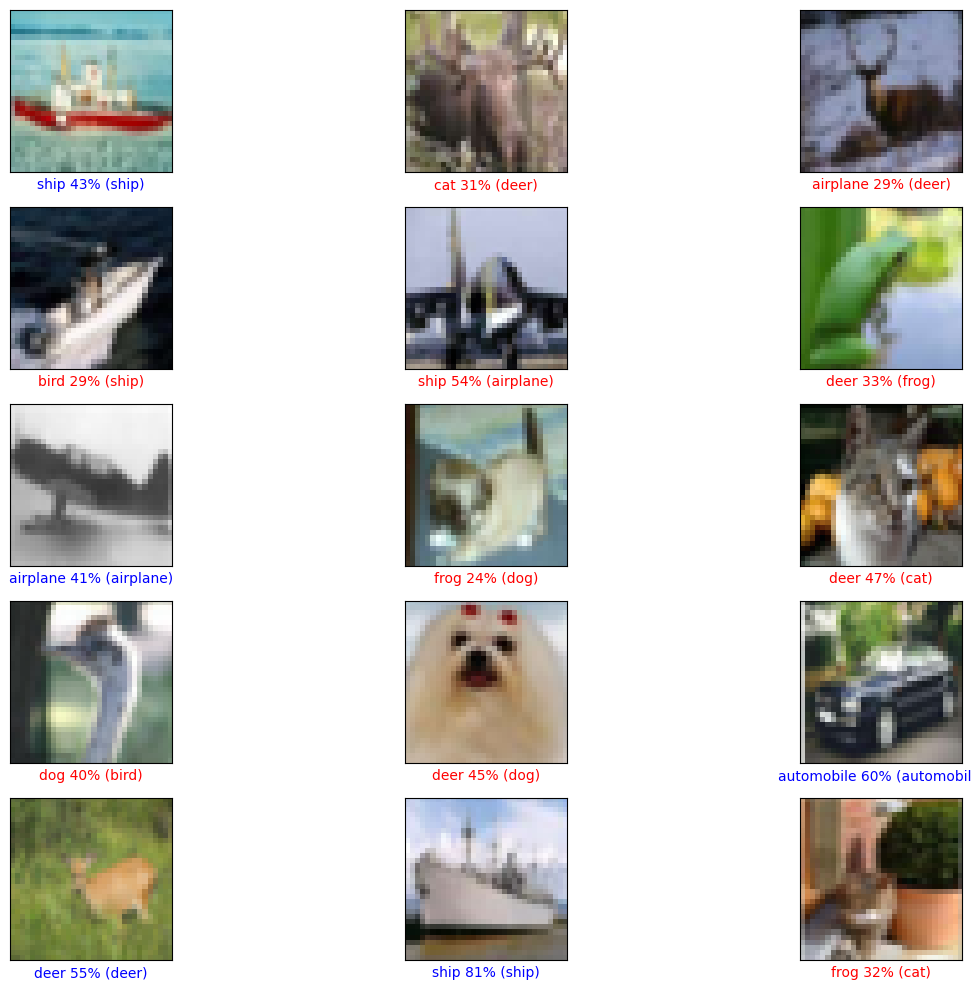

In [13]:
# Melakukan prediksi
predictions = model.predict(x_test)

# Menampilkan hasil prediksi
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                         100*np.max(predictions_array),
                                         classes[true_label]),
                                         color=color)

# Plotting beberapa gambar dengan hasil prediksinya
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols*2, 2*i+1)
    plot_image(predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()
